# Assignment 3

## Task 0

In [17]:
import pandas as pd
data = pd.read_csv("iris_clusters.csv", delimiter=";")
data = data.drop(columns=["id"])
data.head()

,pl,pw,sl,sw
0,6.7,3.0,4.6,1.5
1,6.7,2.8,4.6,1.2
2,5.0,3.6,1.6,0.5
3,6.3,3.1,5.9,2.5
4,7.0,2.9,5.7,1.7


## Task 1

Cluster Counts:1    193
0    106
2      1
Name: count, dtype: int64


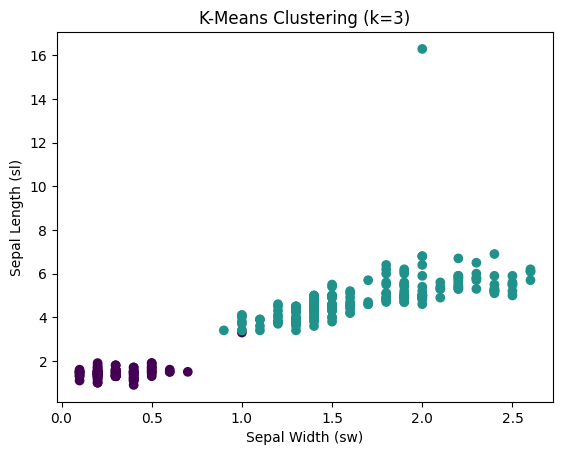

In [18]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(data)

# Accessing cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
cluster_counts = pd.Series(labels).value_counts()
print(f"Cluster Counts:{cluster_counts}")
# Plotting the data using two features: "sw" (sepal width) and "sl" (sepal length)
plt.scatter(data["sw"], data["sl"], c=labels, cmap='viridis')
plt.xlabel('Sepal Width (sw)')
plt.ylabel('Sepal Length (sl)')
plt.title('K-Means Clustering (k=3)')
plt.show()

## Task 2

Number of records in each cluster after filtering outliers:
1    104
2    100
0     93
dtype: int64


/Users/gangesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


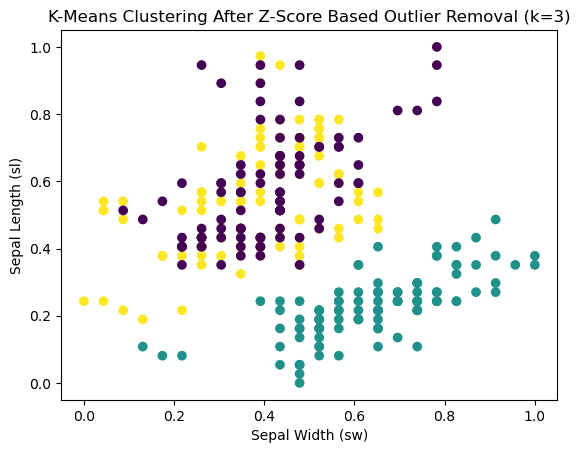

Cluster Labels: [2 2 1 2 2 1 2 2 2 2 2 1 2 2 1 1 2 2 2 1 1 2 1 1 2 2 1 1 2 2 1 1 2 2 2 2 1
 2 2 2 2 1 1 2 1 2 1 1 2 2 1 2 2 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 2 2
 2 1 2 2 2 1 1 1 1 2 2 1 1 1 2 2 2 1 2 2 2 2 2 2 1 1 1 2 1 2 2 1 2 1 2 2 2
 1 2 2 2 1 2 1 2 2 1 2 2 1 1 2 2 2 2 1 2 1 2 2 2 2 2 1 2 2 1 2 1 2 1 2 2 0
 0 0 0 2 0 1 1 0 1 2 0 0 0 2 0 0 1 1 1 2 0 0 2 0 1 0 0 0 0 1 1 1 0 0 1 1 0
 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0
 1 1 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0
 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 1 0
 0]
Cluster Centroids: [[0.58558559 0.41093969 0.69390681 0.69376344 0.79271685]
 [0.22817048 0.64172241 0.09070513 0.08076923 0.52730645]
 [0.54864865 0.38565217 0.62566667 0.6076     0.29484963]]


In [24]:
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 2) Outlier Detection using Z-score
# Compute Z-scores for each feature
z_scores = np.abs(zscore(data))

# Set a threshold for Z-scores (commonly 3 to detect outliers)
threshold = 3

# Identify rows where any feature's Z-score is greater than the threshold
outliers = (z_scores > threshold).any(axis=1)

# Filter out the outliers
filtered_data = data[~outliers]
scaler = MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(filtered_data), columns=data.columns)

# 3) K-Means clustering with k=3 after filtering out the outliers
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Accessing cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Find the number of records in each cluster
cluster_counts = pd.Series(labels).value_counts()

# Output the number of records in each cluster
print("Number of records in each cluster after filtering outliers:")
print(cluster_counts)

# Plotting the data using two features: "sw" (sepal width) and "sl" (sepal length)
plt.scatter(scaled_data["pw"], scaled_data["pl"], c=labels, cmap='viridis')
plt.xlabel('Sepal Width (sw)')
plt.ylabel('Sepal Length (sl)')
plt.title('K-Means Clustering After Z-Score Based Outlier Removal (k=3)')
plt.show()

# Output cluster labels and centroids for reference
print("Cluster Labels:", labels)
print("Cluster Centroids:", centroids)

Cluster Counts:1    107
0    106
2     87
Name: count, dtype: int64


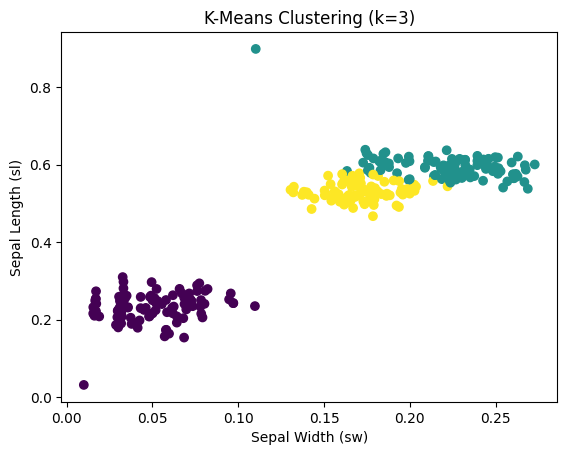

In [19]:
from sklearn.preprocessing import normalize

columns_to_normalize = ['pl', 'pw', 'sl', 'sw']

data[columns_to_normalize] = normalize(data[columns_to_normalize])

kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

# Accessing cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
cluster_counts = pd.Series(labels).value_counts()
print(f"Cluster Counts:{cluster_counts}")
# Plotting the data using two features: "sw" (sepal width) and "sl" (sepal length)
plt.scatter(data["sw"], data["sl"], c=labels, cmap='viridis')
plt.xlabel('Sepal Width (sw)')
plt.ylabel('Sepal Length (sl)')
plt.title('K-Means Clustering (k=3)')
plt.show()

Cluster Counts: 0    106
1    103
2     86
Name: count, dtype: int64


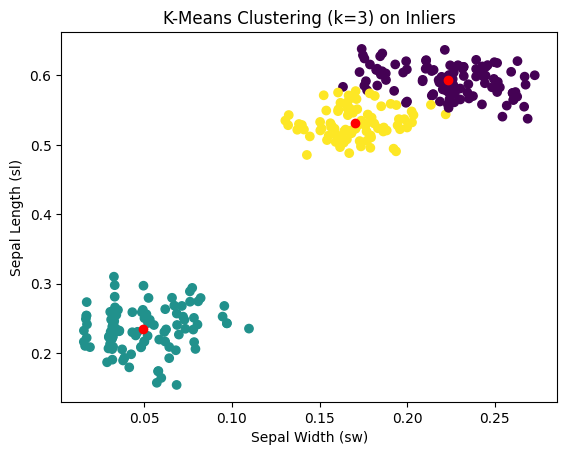

In [28]:
from sklearn.neighbors import LocalOutlierFactor

# columns_to_check = ['pl', 'pw', 'sl', 'sw']

# Fit Local Outlier Factor (LOF)
# n_neighbors=10: checking the 10 nearest neighbors
# novelty=False: used to fit LOF model on training data
contamination = 5 /len(data['pl'])

lof = LocalOutlierFactor(n_neighbors=10, contamination=contamination)  #

# Fit and predict outliers (-1 for outlier, 1 for inliers)
data['outlier_lof'] = lof.fit_predict(data)

# Mark the outliers
outliers_lof = data[data['outlier_lof'] == -1]

filtered_data = data[data['outlier_lof'] == 1].copy()

# Fit KMeans to the filtered data (inliers only)
kmeans = KMeans(n_clusters=3)
kmeans.fit(filtered_data)  # Only use relevant features for clustering

# Accessing cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Show cluster counts
cluster_counts = pd.Series(labels).value_counts()
print(f"Cluster Counts: {cluster_counts}")


# Plot the filtered data using two features: "sw" (sepal width) and "sl" (sepal length)
plt.scatter(filtered_data["sw"], filtered_data["sl"], c=labels, cmap='viridis')
plt.scatter(centroids[:,3], centroids[:,2], c='r')
plt.xlabel('Sepal Width (sw)')
plt.ylabel('Sepal Length (sl)')
plt.title('K-Means Clustering (k=3) on Inliers')
plt.show()

## Task 3

/Users/gangesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gangesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gangesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/gangesh/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will chang

The optimal value of K is 2 with a Davies-Bouldin index of 0.7975564630703018


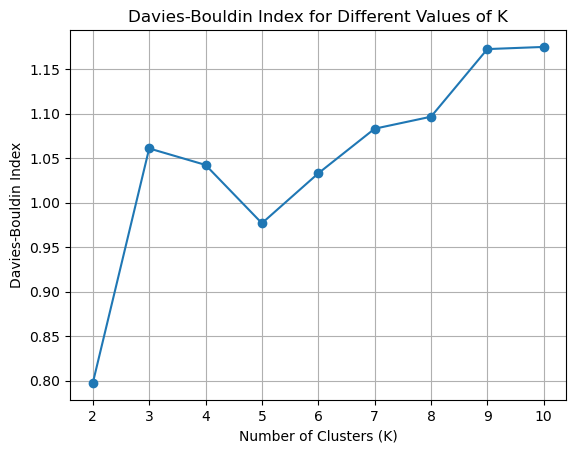

In [25]:
from sklearn.metrics import davies_bouldin_score
db_scores = []
# Loop through values of K from 2 to 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    labels = kmeans.labels_
    # Compute the Davies-Bouldin index
    db_index = davies_bouldin_score(scaled_data, labels)
    db_scores.append(db_index)

# Find the value of K with the lowest Davies-Bouldin index
optimal_k = np.argmin(db_scores) + 2  # +2 because we started from K=2
lowest_db_index = db_scores[optimal_k - 2]

# Output the results
print(f"The optimal value of K is {optimal_k} with a Davies-Bouldin index of {lowest_db_index}")

# Plot the Davies-Bouldin index for each K
plt.plot(range(2, 11), db_scores, marker='o')
plt.title('Davies-Bouldin Index for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

The optimal value of K is 2 with a Davies-Bouldin index of 0.2615322152102988


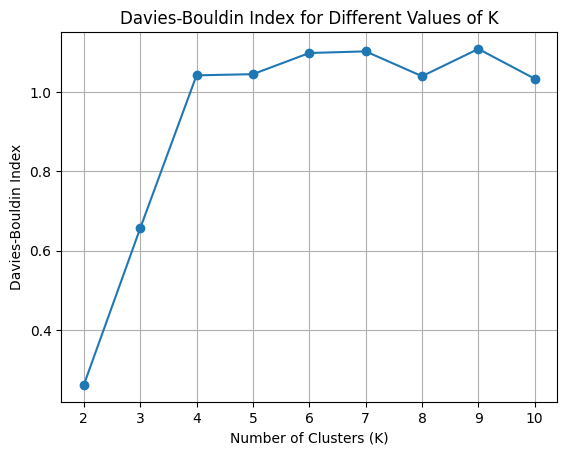

In [38]:
from sklearn.metrics import davies_bouldin_score
k_values = range(2,11)
db_score = []

for k in range(2,11):
    # Fit KMeans to the filtered data (inliers only)
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(filtered_data)  # Only use relevant features for clustering
    labels = kmeans.labels_
    db_score.append(davies_bouldin_score(filtered_data, labels))

min_db_score = min(db_score)
optimal_k = k_values[db_score.index(min_db_score)]
print(f"The optimal value of K is {optimal_k} with a Davies-Bouldin index of {min_db_score}")

# Plot the Davies-Bouldin index for each K
plt.plot(k_values, db_score, marker='o')
plt.title('Davies-Bouldin Index for Different Values of K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

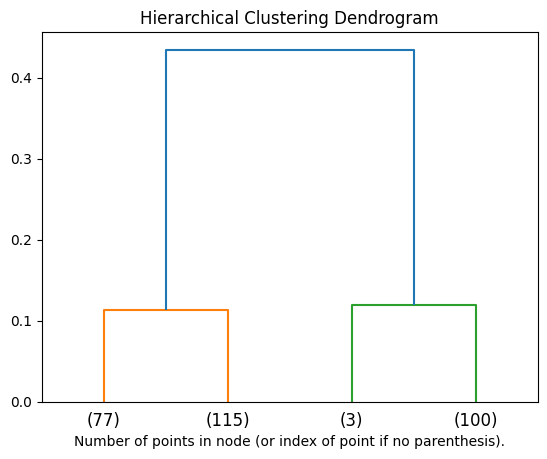

In [65]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering



def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='average')

model = model.fit(filtered_data)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=1)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [82]:
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming filtered_data is your dataset
# DBSCAN with eps=1 and min_samples=5
model = DBSCAN(eps=1, min_samples=5)
dbscan_labels = model.fit_predict(filtered_data)

# Number of clusters (excluding noise points labeled as -1)
n_clusters_including_noise = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise = list(dbscan_labels).count(-1)

print(f"Number of clusters found (excluding noise): {n_clusters_including_noise}")
print(f"Number of noise points: {n_noise}")


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Number of clusters found (excluding noise): 1
Number of noise points: 0
